In [1]:
# prototype 2D domenico robbins ADE function
def c2ad(conc0, distx, disty, dispx, dispy, velocity, time, lenY):
    import math
    from scipy.special import erf, erfc # scipy needs to already be loaded into the kernel
    vadj = velocity / 1.0 # structure is in anticipation of adding adsorbtion and decay
    dispXadj = dispx / 1.0
    dispYadj = dispy / 1.0
    lambadj = 0 / 1.0

    uuu = math.sqrt(1.0 + 4.0*lambadj*dispXadj/vadj)
    ypp = (disty + 0.5*lenY) / (2*math.sqrt(dispYadj*distx))
    ymm = (disty - 0.5*lenY) / (2*math.sqrt(dispYadj*distx))

    arg1 = (distx - vadj*time*uuu) / (2*math.sqrt(dispXadj*vadj*time))
    arg2 = (distx / (2*dispXadj)) * (1 - uuu)

    term0 = conc0 / 4
    term1 = math.exp(arg2)
    term2 = erfc(arg1)
    term3 = (erf(ypp) - erf(ymm))

    c2ad = term0 * term1 * term2 * term3
    return c2ad

In [2]:
# inputs
c_initial = 100.0 # g/m^3
xx = 100          # meters
yy = 0            # meters
Dx = 0.50          # m^2/day
Dy = 0.05          # m^2/day
V  = 1.0           # m/day
time = 100.0      # days
Y  = 10.0          # meters
alphax = Dx/V
alphay = Dy/V
output=c2ad(c_initial, xx, yy, alphax, alphay, V, time, Y)
print("x= ",round(xx,2)," y= ",round(yy,2)," t= ",round(time,1)," C(x,y,t) = ",round(output,3))

x=  100  y=  0  t=  100.0  C(x,y,t) =  44.308


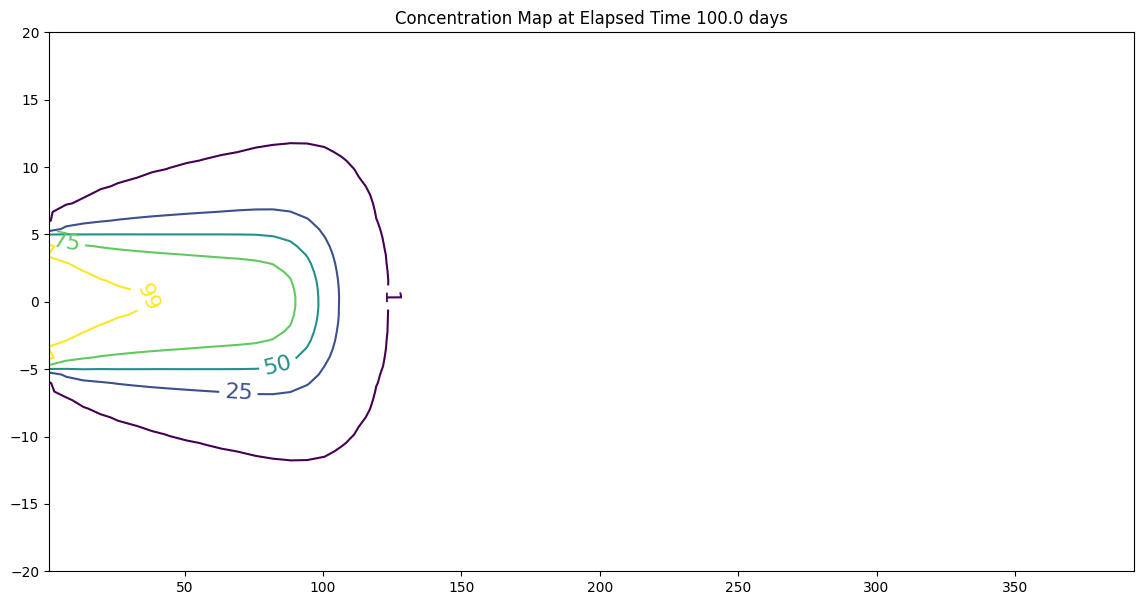

In [3]:
# make a plot
x_max = 400
y_max = 20
# build a grid
nrows = 50   
deltax = (x_max)/nrows
x = []
x.append(1)
for i in range(nrows):
    if x[i] == 0.0:
        x[i] = 0.00001
    x.append(x[i]+deltax)

ncols = 50   
deltay = (y_max*2)/(ncols-1)
y = []
y.append(-y_max)
for i in range(1,ncols):
    if y[i-1] == 0.0:
        y[i-1] = 0.00001
    y.append(y[i-1]+deltay)
    
#y

#y = [i*deltay for i in range(how_many_points)] # constructor notation
#y[0]=0.001
ccc = [[0 for i in range(nrows)] for j in range(ncols)]

for jcol in range(ncols):
    for irow in range(nrows):
        ccc[irow][jcol] = c2ad(c_initial, x[irow], y[jcol], alphax, alphay, V, time, Y)
        
#y

my_xyz = [] # empty list
count=0
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([ x[irow],y[jcol],ccc[irow][jcol] ])
       # print(count)
        count=count+1
        
#print(len(my_xyz))

import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
#print(min(coord_x), max(coord_x)) # activate to examine the dataframe
#print(min(coord_y), max(coord_y))
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 64)
lat = numpy.linspace(min(coord_y), max(coord_y), 64)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = [1,25,50,75,99])
ax.clabel(CS, inline=1, fontsize=16)
ax.set_title('Concentration Map at Elapsed Time '+ str(round(time,1))+' days');